Project 2 

In [1]:
import pandas as pd

df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [3]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                     

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [68]:
del df["Cabin"]

In [6]:
df[['Age','Fare']].describe()

,Age,Fare
count,332.000000,417.000000
mean,30.272590,35.627188
std,14.181209,55.907576
min,0.170000,0.000000
25%,21.000000,7.895800
50%,27.000000,14.454200
75%,39.000000,31.500000
max,76.000000,512.329200


In [79]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

<Axes: >

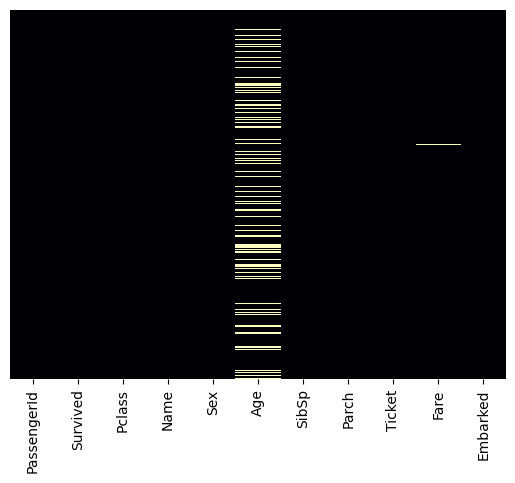

In [71]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="magma")

<Axes: xlabel='Pclass', ylabel='Age'>

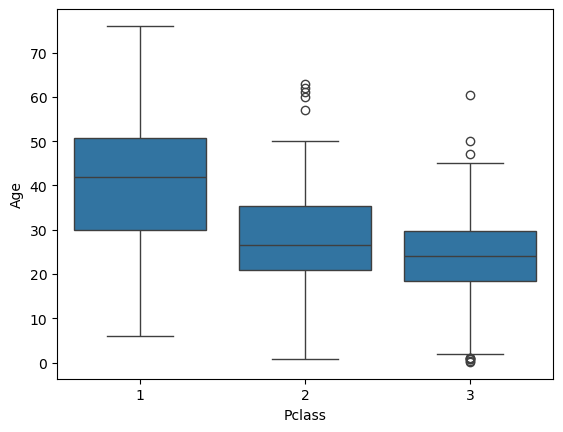

In [81]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [85]:
def impute_age(cols):
    Age=cols.iloc[0]
    Pclass=cols.iloc[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 25
        else:
            return 22
    else:
        return Age
        

In [86]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

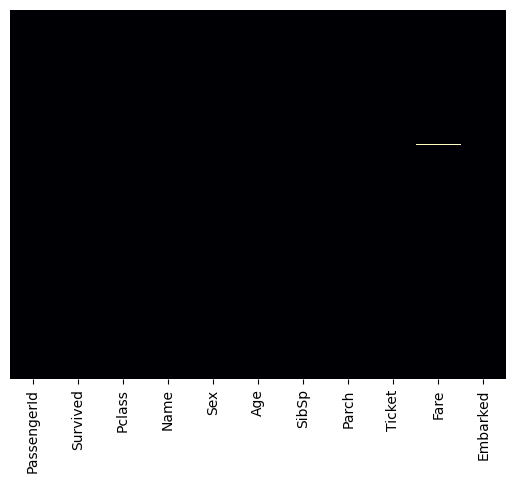

In [87]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="magma")

In [90]:
df["Fare"].mean()

35.627188489208635

In [92]:
df['Fare']=df.fillna(35.627188489208635,inplace=True)

In [93]:
group = df.groupby(['Pclass', 'Survived'])[df.select_dtypes(include=['number']).columns].mean()
group

PassengerId  Survived  Pclass        Age     SibSp     Parch
Pclass Survived                                                              
1      0         1093.087719       0.0     1.0  40.701754  0.403509  0.280702
       1         1104.080000       1.0     1.0  41.360000  0.560000  0.500000
2      0         1121.142857       0.0     2.0  30.563492  0.301587  0.142857
       1         1111.200000       1.0     2.0  24.397333  0.533333  0.766667
3      0         1098.349315       0.0     3.0  23.660342  0.404110  0.328767
       1         1085.722222       1.0     3.0  22.745417  0.583333  0.597222

In [94]:
grouping=df.groupby('Pclass')['Survived'].mean() *100
print(f"{grouping}  Here the survival rate of each passenger traveling in different class are.")

Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64  Here the survival rate of each passenger traveling in different class are.


<Axes: title={'center': 'Survival rates of Pclass'}, xlabel='Pclass', ylabel='Survived'>

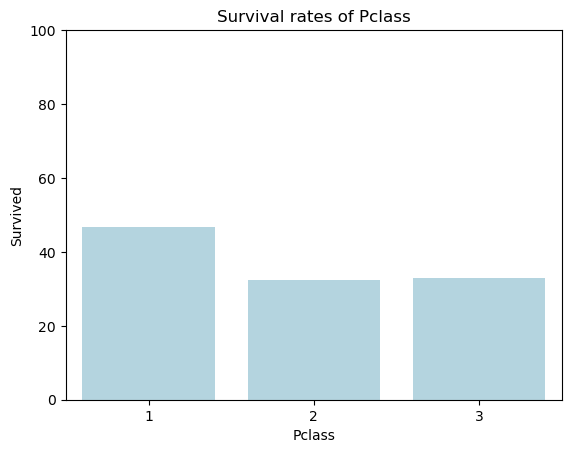

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.ylim(0, 100)
plt.title("Survival rates of Pclass")
sns.barplot(grouping,color="lightblue")

In [97]:
df.describe()[["Survived","Pclass","Age"]]

,Survived,Pclass,Age
count,418.000000,418.000000,418.000000
mean,0.363636,2.265550,29.037081
std,0.481622,0.841838,13.161277
min,0.000000,1.000000,0.170000
25%,0.000000,1.000000,22.000000
50%,0.000000,3.000000,25.000000
75%,1.000000,3.000000,36.375000
max,1.000000,3.000000,76.000000
